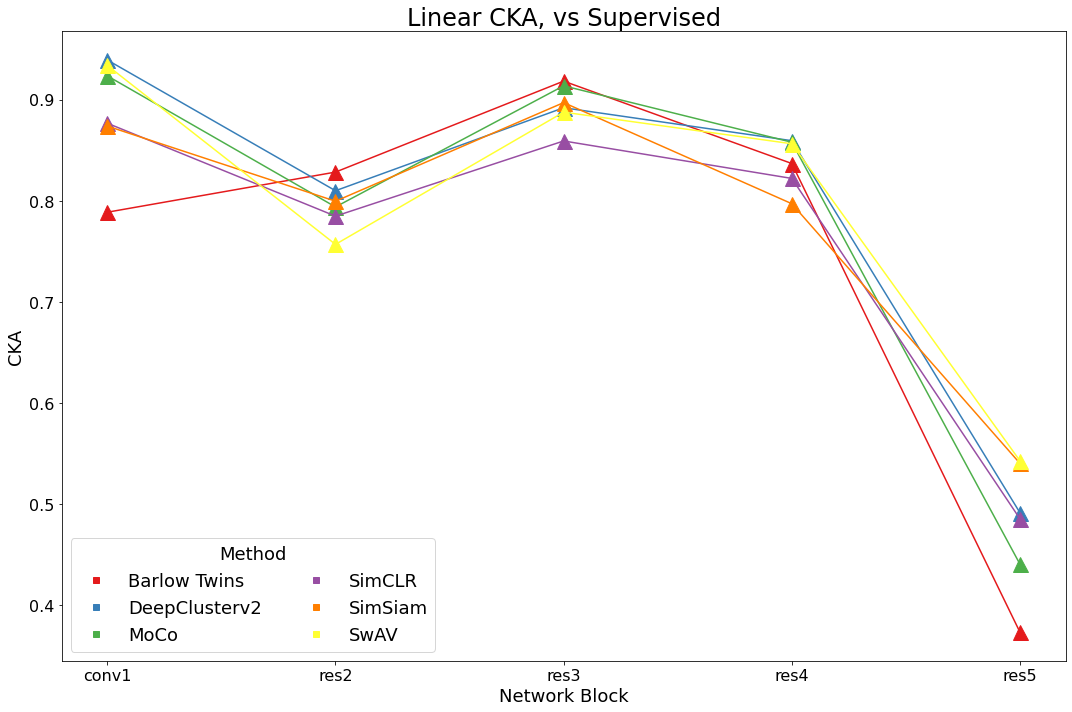

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)
cmap = plt.get_cmap('Set1')
colormap = np.array(list(cmap.colors))


results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka.out.972115', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[-57:-2]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in results:
            results[dataset] = {}
        if method not in results[dataset]:
            results[dataset][method] = {}
        
        results[dataset][method][layer] = cka


dataset = 'imagenet'
#dataset = 'cub'
layer_names = ['conv1', 'res2', 'res3', 'res4', 'res5']
method_names = ['Barlow Twins', 'DeepClusterv2', 'MoCo', 'SimCLR', 'SimSiam', 'SwAV']
backbones = ['btwins_r50_1000', 'dcv2_r50_800', 'moco_r50_800', 'simclr_r50_800', 'simsiam_r50_100', 'swav_r50_800']

fig, ax = plt.subplots(1, 1)
for i, backbone in enumerate(backbones):
    ckas = []
    for layer_name in layer_names:
        ckas.append(results[dataset][backbone][layer_name])
    ax.plot(ckas, marker='^', markersize=15, c=colormap[i], label=backbone)
    
ax.set_xticks(list(range(0, len(layer_names))))
ax.set_xticklabels(layer_names)

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colormap[i]) for i in range(7)]
ax.legend(handles,
          method_names,
          title='Method',
          title_fontsize=18,
          scatterpoints=1,
          ncol=2,
          fontsize=18)

ax.set_xlabel('Network Block', fontsize=18)
ax.set_ylabel('CKA', fontsize=18)
ax.set_title('Linear CKA, vs Supervised', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
    
fig.tight_layout()
plt.savefig('cka_imagenet_ssl_vs_supervised', bbox_inches = 'tight',
    pad_inches = 0.1)

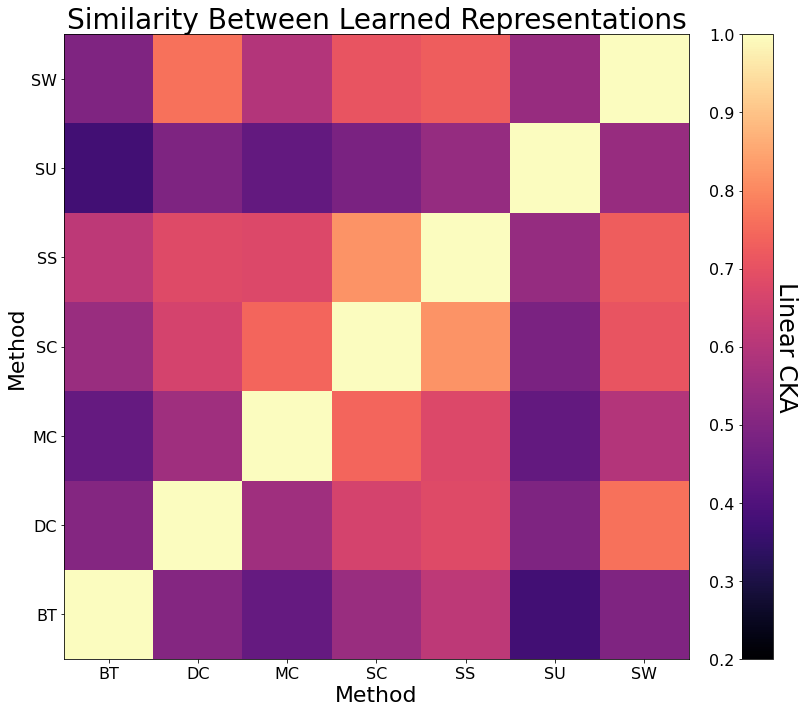

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)


results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_all.out.972111', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in results:
            results[dataset] = {}
        if method_a not in results[dataset]:
            results[dataset][method_a] = {}
        if method_b not in results[dataset][method_a]:
            results[dataset][method_a][method_b] = {}
        
        results[dataset][method_a][method_b][layer] = cka


method_names = {
    'btwins_r50_1000': 'BT',
    'dcv2_r50_800': 'DC',
    'moco_r50_800': 'MC',
    'simclr_r50_800': 'SC',
    'simsiam_r50_100': 'SS',
    'supervised_r50': 'SU',
    'swav_r50_800': 'SW'    
}
dataset = 'imagenet'
cka_matrix = np.zeros((len(results[dataset]), len(results[dataset])))
for i, method_a in enumerate(list(method_names.keys())):
    for j, method_b in enumerate(list(method_names.keys())):
        cka_matrix[i][j] = results[dataset][method_a][method_b]['res5']

fig, ax = plt.subplots(1, 1)
color_values = ax.imshow(cka_matrix, origin='lower', vmin=0.2, cmap=plt.get_cmap('magma'))
ax.set_xticks(list(range(0, len(method_names))))
ax.set_yticks(list(range(0, len(method_names))))
ax.set_xticklabels(list(method_names.values()))
ax.set_yticklabels(list(method_names.values()))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_title('Similarity Between Learned Representations', fontsize=28)
ax.set_xlabel('Method', fontsize=22)
ax.set_ylabel('Method', fontsize=22)

cbar = fig.colorbar(color_values, ax=ax)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Linear CKA', rotation=270, fontsize=24, labelpad=25)
cbar.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig('teaser_cka', bbox_inches = 'tight', pad_inches = 0.1)

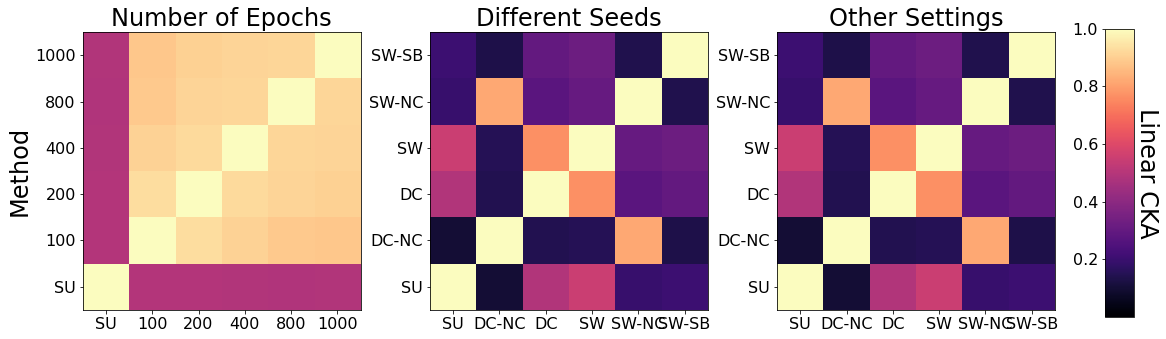

In [96]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

title_size = 24

simclr_results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_simclr.out.977513', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in simclr_results:
            simclr_results[dataset] = {}
        if method_a not in simclr_results[dataset]:
            simclr_results[dataset][method_a] = {}
        if method_b not in simclr_results[dataset][method_a]:
            simclr_results[dataset][method_a][method_b] = {}
        
        simclr_results[dataset][method_a][method_b][layer] = cka
        
dc_swav_results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_ablation.out.977577', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in dc_swav_results:
            dc_swav_results[dataset] = {}
        if method_a not in dc_swav_results[dataset]:
            dc_swav_results[dataset][method_a] = {}
        if method_b not in dc_swav_results[dataset][method_a]:
            dc_swav_results[dataset][method_a][method_b] = {}
        
        dc_swav_results[dataset][method_a][method_b][layer] = cka


simclr_method_names = {
    'supervised_r50': 'SU',
    'simclr_r50_100': '100',
    'simclr_r50_200': '200',
    'simclr_r50_400': '400',
    'simclr_r50_800': '800',
    'simclr_r50_1000': '1000'
}
dc_swav_method_names = {
    'supervised_r50': 'SU',
    'dcv2_r50_400': 'DC-NC',
    'dcv2_r50_800': 'DC',
    'swav_r50_400': 'SW',
    'swav_r50_400_lesscrop': 'SW-NC',
    'swav_r50_400_smallbatch': 'SW-SB'
}
dataset = 'imagenet'

simclr_cka_matrix = np.zeros((len(simclr_results[dataset]), len(simclr_results[dataset])))
for i, method_a in enumerate(list(simclr_method_names.keys())):
    for j, method_b in enumerate(list(simclr_method_names.keys())):
        simclr_cka_matrix[i][j] = simclr_results[dataset][method_a][method_b]['res5']
        
dc_swav_cka_matrix = np.zeros((len(dc_swav_results[dataset]), len(dc_swav_results[dataset])))
for i, method_a in enumerate(list(dc_swav_method_names.keys())):
    for j, method_b in enumerate(list(dc_swav_method_names.keys())):
        dc_swav_cka_matrix[i][j] = dc_swav_results[dataset][method_a][method_b]['res5']

cka_min = min([simclr_cka_matrix.min(), dc_swav_cka_matrix.min()])
        
fig, axs = plt.subplots(1, 3)
color_values = axs[0].imshow(simclr_cka_matrix, origin='lower', vmin=max(0.0, cka_min - 0.1), vmax=1.0, cmap=plt.get_cmap('magma'))
axs[0].set_xticks(list(range(0, len(simclr_method_names))))
axs[0].set_yticks(list(range(0, len(simclr_method_names))))
axs[0].set_xticklabels(list(simclr_method_names.values()))
axs[0].set_yticklabels(list(simclr_method_names.values()))
axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[0].tick_params(axis='both', which='minor', labelsize=16)
axs[0].set_ylabel('Method', fontsize=title_size)
axs[0].set_title('Number of Epochs', fontsize=title_size)

color_values = axs[1].imshow(dc_swav_cka_matrix, origin='lower', vmin=max(0.0, cka_min - 0.1), vmax=1.0, cmap=plt.get_cmap('magma'))
axs[1].set_xticks(list(range(0, len(dc_swav_method_names))))
axs[1].set_yticks(list(range(0, len(dc_swav_method_names))))
axs[1].set_xticklabels(list(dc_swav_method_names.values()))
axs[1].set_yticklabels(list(dc_swav_method_names.values()))
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='minor', labelsize=16)
axs[1].set_title('Different Seeds', fontsize=title_size)

color_values = axs[2].imshow(dc_swav_cka_matrix, origin='lower', vmin=max(0.0, cka_min - 0.1), vmax=1.0, cmap=plt.get_cmap('magma'))
axs[2].set_xticks(list(range(0, len(dc_swav_method_names))))
axs[2].set_yticks(list(range(0, len(dc_swav_method_names))))
axs[2].set_xticklabels(list(dc_swav_method_names.values()))
axs[2].set_yticklabels(list(dc_swav_method_names.values()))
axs[2].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='minor', labelsize=16)
axs[2].set_title('Other Settings', fontsize=title_size)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.835, 0.3, 0.02, 0.4]) #xmin, ymin, width, height
cbar = fig.colorbar(color_values, cax=cbar_ax)#, cax=cbar_ax)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Linear CKA', rotation=270, fontsize=title_size, labelpad=25)
cbar.ax.yaxis.set_ticks_position('left')

fig.subplots_adjust(wspace=0.25)
plt.savefig('cka_control', bbox_inches = 'tight', pad_inches = 0.1)

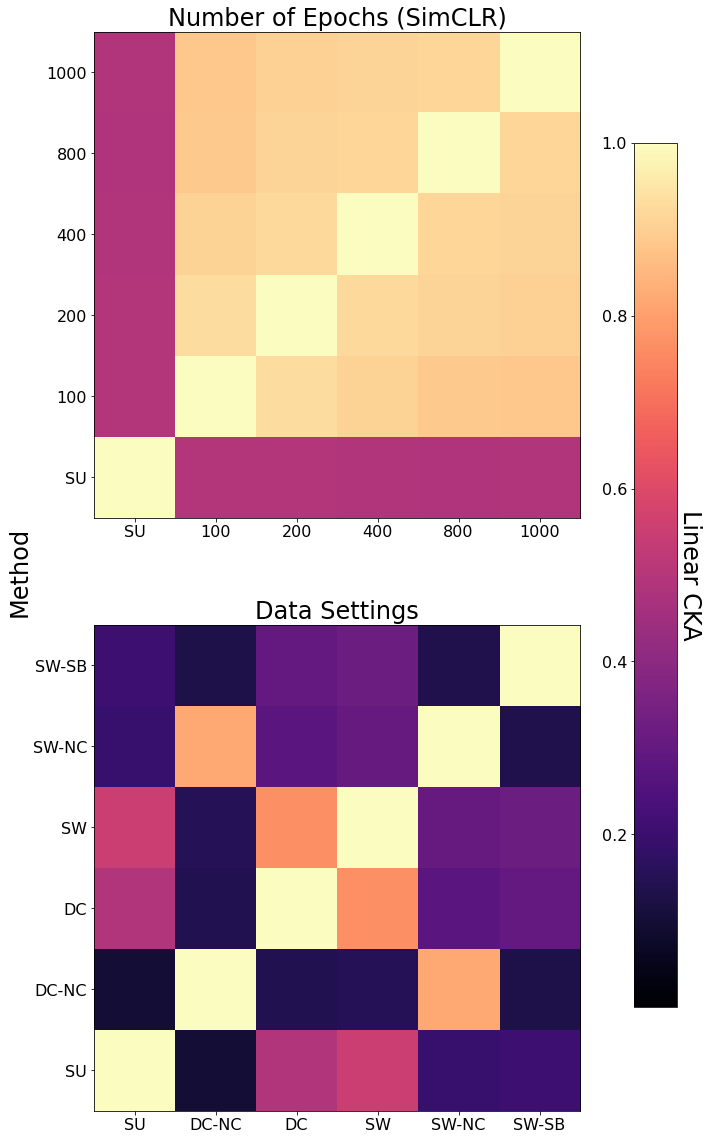

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,20)

title_size = 24

simclr_results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_simclr.out.977513', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in simclr_results:
            simclr_results[dataset] = {}
        if method_a not in simclr_results[dataset]:
            simclr_results[dataset][method_a] = {}
        if method_b not in simclr_results[dataset][method_a]:
            simclr_results[dataset][method_a][method_b] = {}
        
        simclr_results[dataset][method_a][method_b][layer] = cka
        
dc_swav_results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_ablation.out.977577', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in dc_swav_results:
            dc_swav_results[dataset] = {}
        if method_a not in dc_swav_results[dataset]:
            dc_swav_results[dataset][method_a] = {}
        if method_b not in dc_swav_results[dataset][method_a]:
            dc_swav_results[dataset][method_a][method_b] = {}
        
        dc_swav_results[dataset][method_a][method_b][layer] = cka


simclr_method_names = {
    'supervised_r50': 'SU',
    'simclr_r50_100': '100',
    'simclr_r50_200': '200',
    'simclr_r50_400': '400',
    'simclr_r50_800': '800',
    'simclr_r50_1000': '1000'
}
dc_swav_method_names = {
    'supervised_r50': 'SU',
    'dcv2_r50_400': 'DC-NC',
    'dcv2_r50_800': 'DC',
    'swav_r50_400': 'SW',
    'swav_r50_400_lesscrop': 'SW-NC',
    'swav_r50_400_smallbatch': 'SW-SB'
}
dataset = 'imagenet'

simclr_cka_matrix = np.zeros((len(simclr_results[dataset]), len(simclr_results[dataset])))
for i, method_a in enumerate(list(simclr_method_names.keys())):
    for j, method_b in enumerate(list(simclr_method_names.keys())):
        simclr_cka_matrix[i][j] = simclr_results[dataset][method_a][method_b]['res5']
        
dc_swav_cka_matrix = np.zeros((len(dc_swav_results[dataset]), len(dc_swav_results[dataset])))
for i, method_a in enumerate(list(dc_swav_method_names.keys())):
    for j, method_b in enumerate(list(dc_swav_method_names.keys())):
        dc_swav_cka_matrix[i][j] = dc_swav_results[dataset][method_a][method_b]['res5']

cka_min = min([simclr_cka_matrix.min(), dc_swav_cka_matrix.min()])
        
fig, axs = plt.subplots(2, 1)
color_values = axs[0].imshow(simclr_cka_matrix, origin='lower', vmin=max(0.0, cka_min - 0.1), vmax=1.0, cmap=plt.get_cmap('magma'))
axs[0].set_xticks(list(range(0, len(simclr_method_names))))
axs[0].set_yticks(list(range(0, len(simclr_method_names))))
axs[0].set_xticklabels(list(simclr_method_names.values()))
axs[0].set_yticklabels(list(simclr_method_names.values()))
axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[0].tick_params(axis='both', which='minor', labelsize=16)
axs[0].set_ylabel('', fontsize=title_size)
axs[0].set_title('Number of Epochs (SimCLR)', fontsize=title_size)

color_values = axs[1].imshow(dc_swav_cka_matrix, origin='lower', vmin=max(0.0, cka_min - 0.1), vmax=1.0, cmap=plt.get_cmap('magma'))
axs[1].set_xticks(list(range(0, len(dc_swav_method_names))))
axs[1].set_yticks(list(range(0, len(dc_swav_method_names))))
axs[1].set_xticklabels(list(dc_swav_method_names.values()))
axs[1].set_yticklabels(list(dc_swav_method_names.values()))
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='minor', labelsize=16)
axs[1].set_title('Data Settings', fontsize=title_size)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.875, 0.2, 0.06, 0.6]) #xmin, ymin, width, height
cbar = fig.colorbar(color_values, cax=cbar_ax)#, cax=cbar_ax)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('Linear CKA', rotation=270, fontsize=title_size, labelpad=25)
cbar.ax.yaxis.set_ticks_position('left')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel('Method', fontsize=title_size, labelpad=40)

fig.subplots_adjust(wspace=0.25)
plt.savefig('cka_ablations', bbox_inches = 'tight', pad_inches = 0.1)

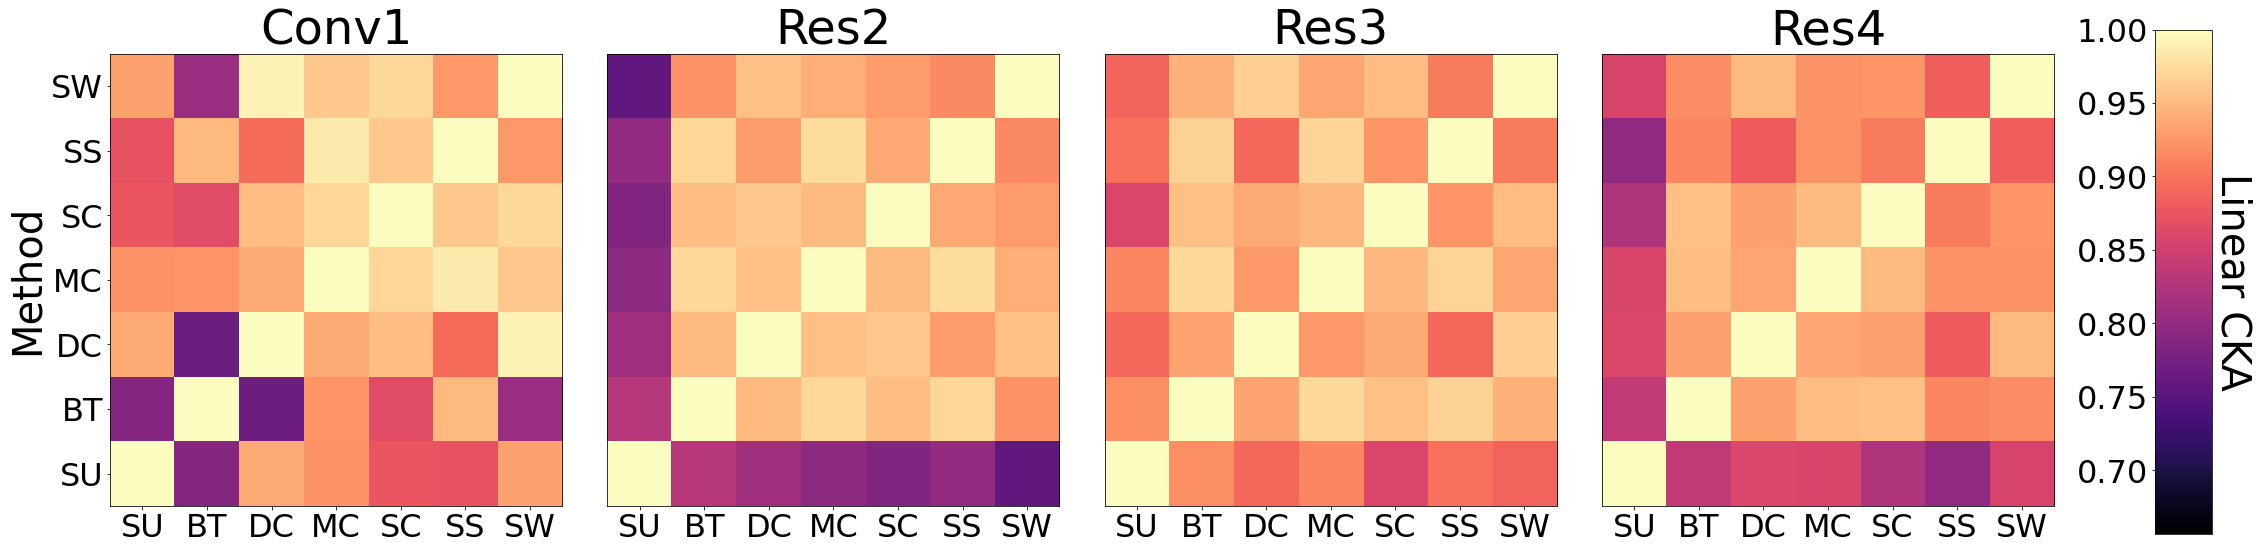

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (40,10)

#### MAKE CKA matrix for layers 1-4 ####

methods = [
    'supervised_r50',
    'btwins_r50_1000',
    'dcv2_r50_800',
    'moco_r50_800',
    'simclr_r50_800',
    'simsiam_r50_100',
    'swav_r50_800'    
]
method_labels = [
    'SU',
    'BT',
    'DC',
    'MC',
    'SC',
    'SS',
    'SW'    
]
layer_names = [
    'conv1',
    'res2',
    'res3',
    'res4'
]

results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/calc_cka_all.out.972111', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines[1:]:
        line = line.strip()
        dataset = line.split(' ')[1][:-1]
        method_a = line.split(' ')[3][:-1]
        method_b = line.split(' ')[5][:-1]
        layer = line.split(' ')[7][:-1]
        cka = float(line.split(' ')[9])
        
        if dataset not in results:
            results[dataset] = {}
        if method_a not in results[dataset]:
            results[dataset][method_a] = {}
        if method_b not in results[dataset][method_a]:
            results[dataset][method_a][method_b] = {}
        
        results[dataset][method_a][method_b][layer] = cka
        
dataset = 'imagenet'
cka_matrices = [np.zeros((7, 7)), np.zeros((7, 7)), np.zeros((7, 7)), np.zeros((7, 7))]
for i, method_a in enumerate(methods):
    for j, method_b in enumerate(methods):
        for k, layer in enumerate(layer_names):
            cka_matrices[k][i][j] = results[dataset][method_a][method_b][layer]
            
v_min = min([cka_matrices[0].min(), cka_matrices[1].min(), cka_matrices[2].min(), cka_matrices[3].min()])
v_max = max([cka_matrices[0].max(), cka_matrices[1].max(), cka_matrices[2].max(), cka_matrices[3].max()])

fig, axs = plt.subplots(1, 4)

color_values_0 = axs[0].imshow(cka_matrices[0], origin='lower', vmin=v_min - 0.1, vmax=1.0, cmap=plt.get_cmap('magma'))
axs[0].set_xticks(list(range(0, len(method_labels))))
axs[0].set_yticks(list(range(0, len(method_labels))))
axs[0].set_xticklabels(method_labels)
axs[0].set_yticklabels(method_labels)
axs[0].tick_params(axis='both', which='major', labelsize=32)
axs[0].tick_params(axis='both', which='minor', labelsize=32)
axs[0].set_title('Conv1', fontsize=48)
axs[0].set_ylabel('Method', fontsize=40)

color_values_1 = axs[1].imshow(cka_matrices[1], origin='lower', vmin=v_min - 0.1, vmax=1.0, cmap=plt.get_cmap('magma'))
axs[1].set_xticks(list(range(0, len(method_labels))))
axs[1].set_yticks([])
axs[1].set_xticklabels(method_labels)
axs[1].tick_params(axis='both', which='major', labelsize=32)
axs[1].tick_params(axis='both', which='minor', labelsize=32)
axs[1].set_title('Res2', fontsize=48)

color_values_2 = axs[2].imshow(cka_matrices[2], origin='lower', vmin=v_min - 0.1, vmax=1.0, cmap=plt.get_cmap('magma'))
axs[2].set_xticks(list(range(0, len(method_labels))))
axs[2].set_yticks([])
axs[2].set_xticklabels(method_labels)
axs[2].tick_params(axis='both', which='major', labelsize=32)
axs[2].tick_params(axis='both', which='minor', labelsize=32)
axs[2].set_title('Res3', fontsize=48)

color_values_3 = axs[3].imshow(cka_matrices[3], origin='lower', vmin=v_min - 0.1, vmax=1.0, cmap=plt.get_cmap('magma'))
axs[3].set_xticks(list(range(0, len(method_labels))))
axs[3].set_yticks([])
axs[3].set_xticklabels(method_labels)
axs[3].tick_params(axis='both', which='major', labelsize=32)
axs[3].tick_params(axis='both', which='minor', labelsize=32)
axs[3].set_title('Res4', fontsize=48)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.835, 0.15, 0.02, 0.7]) #xmin, ymin, width, height
cbar = fig.colorbar(color_values_3, cax=cbar_ax)#, cax=cbar_ax)
cbar.ax.tick_params(labelsize=32) 
cbar.set_label('Linear CKA', rotation=270, fontsize=40, labelpad=40)
cbar.ax.yaxis.set_ticks_position('left')

#fig.tight_layout()
#fig.subplots_adjust(bottom=0.1) 
fig.subplots_adjust(wspace=0.1)
plt.savefig('cka_except_last_layer.png', bbox_inches = 'tight', pad_inches = 0.1)

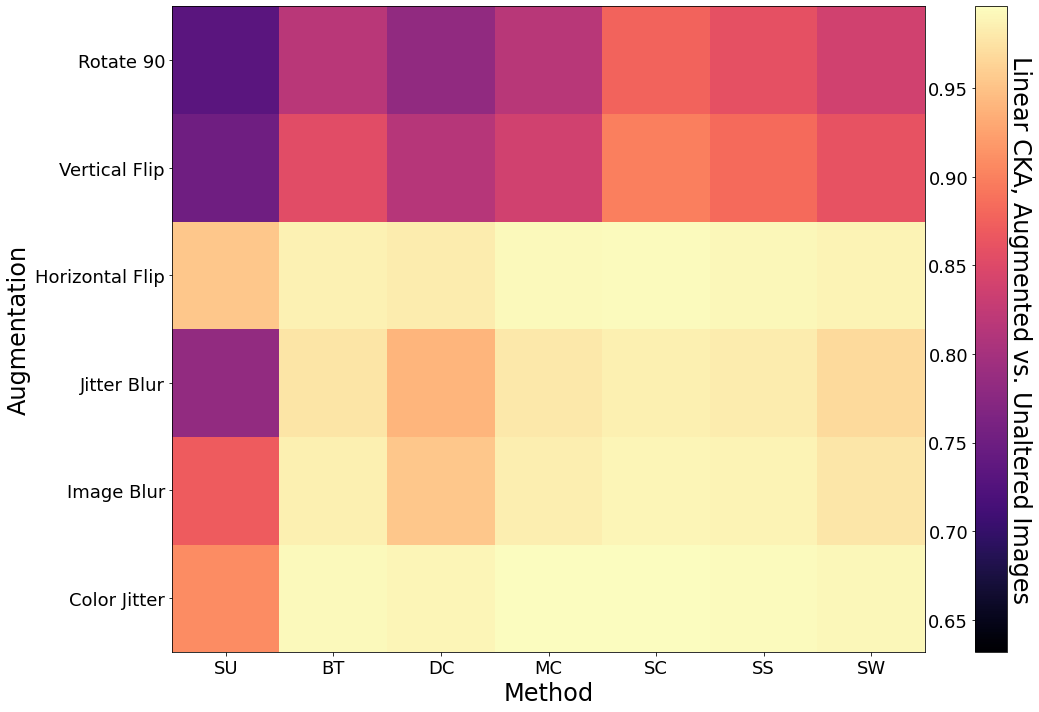

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

results = {}
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/compare_transforms_cka_inet.out.977514', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines:
        if 'Dataset' in line:
            line = line.strip()
            transform = line.split(' ')[3][:-1]
            backbone = line.split(' ')[5][:-1]
            cka = float(line.split(' ')[7])
            if transform not in results:
                results[transform] = {}
            results[transform][backbone] = cka
            
with open('/cfarhomes/mgwillia/unsupervised-analysis/outfiles/compare_transforms_cka_seg_fault.out.977569', 'r') as read_file:
    lines = read_file.readlines()
    for line in lines:
        if 'Dataset' in line:
            line = line.strip()
            transform = line.split(' ')[3][:-1]
            backbone = line.split(' ')[5][:-1]
            cka = float(line.split(' ')[7])
            if transform not in results:
                results[transform] = {}
            results[transform][backbone] = cka

methods = [
    'supervised_r50',
    'btwins_r50_1000',
    'dcv2_r50_800',
    'moco_r50_800',
    'simclr_r50_800',
    'simsiam_r50_100',
    'swav_r50_800'    
]
method_labels = [
    'SU',
    'BT',
    'DC',
    'MC',
    'SC',
    'SS',
    'SW'    
]
transforms = [
    'image_jitter',
    'image_blur',
    'jitter_blur',
    'horizontal_flip',
    'vertical_flip',
#    'both_flip',
    'rotate'
]
transform_labels = [
    'Color Jitter',
    'Image Blur',
    'Jitter Blur',
    'Horizontal Flip',
    'Vertical Flip',
#    'Both Flip',
    'Rotate 90'
]

cka_matrix = np.zeros((len(transforms), len(methods)))
for i, transform in enumerate(transforms):
    for j, method in enumerate(methods):
        cka_matrix[i][j] = results[transform][method]

fig, ax = plt.subplots(1, 1)
color_values = ax.imshow(cka_matrix, origin='lower', vmin=cka_matrix.min() - 0.1, cmap=plt.get_cmap('magma'))
ax.set_xticks(list(range(0, len(methods))))
ax.set_yticks(list(range(0, len(transforms))))
ax.set_xticklabels(method_labels)
ax.set_yticklabels(transform_labels)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xlabel('Method', fontsize=24)
ax.set_ylabel('Augmentation', fontsize=24)

cbar = fig.colorbar(color_values, ax=ax, pad=0.05, fraction=0.043)
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('Linear CKA, Augmented vs. Unaltered Images', rotation=270, fontsize=24, labelpad=25)
cbar.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig('augmentation_invariance', bbox_inches = 'tight', pad_inches = 0.1)